<a href="https://colab.research.google.com/github/nureeee/Machhine-Learning/blob/main/%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도 학습의 개요
분산이 뚜렷한 데이터를 추출?
비지도 학습(Unsupervised Learning)은 기계 학습의 일종으로, **데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속한다.** 지도학습(Supervised Learning)과는 달리 **입력값에 대한 정답(목표치)가 주어지지 않는다.**


* 차원 축소 : PCA, LDA, SVD
* 군집화 : KMeans Clustering, DBSCAN Clustering
  * 군집화 평가

# 차원 축소
* `feature`의 개수를 줄여주는 것이 기본!
* 각각의 데이터들이 나타내고 있는 **특징**추출하는 역할을 하기도 한다.
* 계산 비용을 감소하는 효과
* **전반적인 데이터에 대한 이해도를 높이는 효과**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

In [ ]:
iris = datasets.load_iris()
data = iris['data']

data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
df = pd.DataFrame(data, columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# PCA차원축소
* 분산 - 데이터가 펼쳐진 정도
* 데이터가 얼마나 커지는가를 중점으로 본다
- 주성분 분석(PCA)는 선형 차원 축소 기법이다. 매우 인기 있게 사용되는 차원 축소 기법이다.

* 주요 특징중 하나는 **분산(variance)을 최대한 보존**한다는 점

* `components` : PCA의 결과의 개수

In [ ]:
pca = PCA(n_components=2)


In [ ]:
data_scaled = StandardScaler().fit_transform(df.iloc[:, :-1])

In [ ]:
data_scaled.shape

(150, 4)

In [ ]:
pca_data = pca.fit_transform(data_scaled) # 데이터를 추출하는 용도로만 사용 변환은 아니다.
pca_data.shape

(150, 2)

# 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


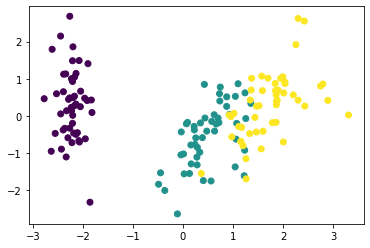

In [ ]:
plt.scatter(
    pca_data[:, 0],
    pca_data[:, 1],
    c=df['target']
)
plt.show()
# 4차원을 2차원으로 줄임????


## PCA에서 component의 값을 1 미만으로 넣으면 (보통  0.99) 분산을 기준으로 차원을 축소

데이터들을 가장 잘 표현해 줄수 있는 방향??


In [ ]:
pca = PCA(n_components=0.99) # 자동으로 주성분 탐색

In [ ]:
pca_data = pca.fit_transform(data_scaled)
pca_data[:5]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ]])

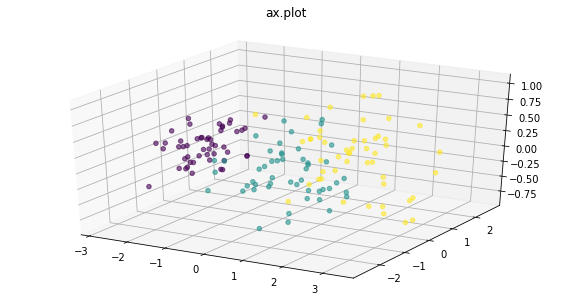

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 50
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.6, c=df['target'])
plt.savefig('./tmp.svg')
plt.title("ax.plot")
plt.show()

# LDA ( Linaer Discriminant Analysis ) : 선형 판별 분석법 (PCA와 유사)
* LDA는 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 내부 분산의 비율을 최대화 하는 방식으로 축소합니다.
* 클래스 간 분산이 최대가 되고, > 클래스 끼리는 널찍이 떨어져 있는 것이 좋다. 
* 크래스 내부 분산이 최소가 되면 > 같은 클래스 끼리는 가까이 있는ㄴ게 좋다

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2) # 클래스가 3개여서 2개까지...???
lda_data = lda.fit_transform(data_scaled, df['target'])
lda_data.shape

(150, 2)

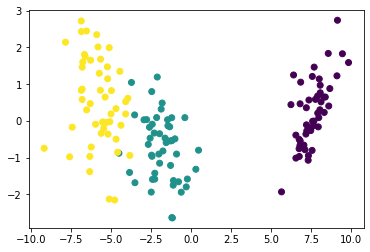

In [ ]:
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])
plt.show()

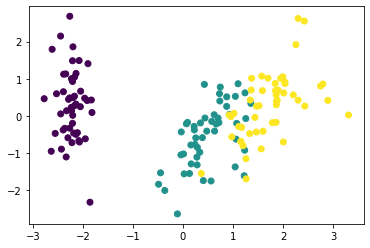

In [ ]:
plt.scatter(pa_data[:, 0], pa_data[:, 1], c=df['target'])
plt.show()

# 군집 (Clustering)

## KMeans Clustering
* 최근접 이웃 군집
* 군집화에서  가장  대중적으로 사용되는 알고리즘
* centroid라는 ** 중심점**을 기준으로 가장 가까운 데이터 포인트들을 선택해서 군집화 하는 기법
----
* 스팸 문자 분류
* 뉴스 기사 분류

In [ ]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters=3) # 사용할 클러스터의 개수가 필요하다

In [ ]:
cluster_data = KMeans.fit_transform(iris['data'])
cluster_data.shape # 150개의 데이터가 3개의 군집에 들어갔다.

(150, 3)

In [ ]:
KMeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


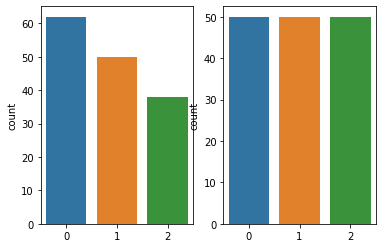

In [ ]:
plt.subplot(121)
sns.countplot(KMeans.labels_)

plt.subplot(122)
sns.countplot(iris['target'])

plt.show()

## DBSCAN ()

밀도 기반 크러스터링
* 밀도가 높은 부분을 클러스터링 하는 방식 
* 어느점 ( 찍혀있는 데이터 포인터 중 하나 )을 기준으로 반경 x 내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
* KMeans 에서는 n_cluster의 개수를 반드시 지정해서 클러스트의 개수를 미리 지정
* DBSCAN은 클러스터의 개수를 미리 지정할 필요 없다.
* 기하학적인 클러스터도 잘 찾아낸다.
 ----
 * epsilon : 거리
 * min_samples : epsilon거리 안 쪽에 있어야 하는 최소 샘플의 개수

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)

In [ ]:
dbscan_data = dbscan.fit_predict(iris['data'])
dbscan_data
# 0을 포함한 양수는 군집 label
# 음수는 군집 label에 못들어간 데이터 포인트  
# eps가 클수록 군집을 크게 잡곡 분리한다.
# > 군집에 포함시키는 거리가 길어진다? 아웃라이어가 줄어든다

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  2,
        3,  2,  4,  5, -1,  3,  6,  5, -1, -1, -1, -1,  7, -1,  5,  8,  4,
        9,  4, 10, -1, -1,  7,  5,  5, -1, -1,  7, -1,  4,  4,  4, -1,  8,
       -1,  2,  9,  4,  4,  4,  7,  4,  6,  4,  4,  4,  5, -1,  4, -1, 11,
       -1, 12, -1, 13, -1, 14, -1, -1, 15, -1, 16, 11, -1, -1, 12, -1, -1,
       -1, 17, -1, 13, 10, 17, -1, 10, 10, 18, -1, 14, -1, 18, -1, -1, -1,
       19, 12, 10, 16, 17, 20, 11, 17, 17, 20, 10, 15, 19, 10])

# 실루엣 스코어 (군집화 평가)


크러스터링의 품질을 정량적으로 평가해주는 지표
* 1 : 클러스터링의 품질이 좋다
* 0 : 클러스터링의 품질이 안좋다 (클러스러링의 의미가 없다)
* 음수 : 에초에 잘못 분류됨

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
# 정답을 알고있지만 비지도학습을 할 때???
score = silhouette_score(data_scaled, KMeans.labels_) # (원본데이터, 군집한거??)
score
# 클러스트의 개수가 적어지면 품질이 좋아질 것 같다.


0.44366157397640527

샘플마다의 점수

In [ ]:
samples = silhouette_samples(data_scaled, KMeans.labels_)
samples[:5]

array([0.73318987, 0.57783809, 0.68201014, 0.62802187, 0.72693222])

In [ ]:
samples.mean()

0.44366157397640527